## Regularized Linear Regression and Bias vs. Variance

In [375]:
from scipy.io import loadmat
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

data = loadmat('./ex5/ex5data1.mat'); 

X = data['X']; y = data['y']

Xval = data['Xval']; yval = data['yval'];

Xtest = data['Xtest']; ytest = data['ytest'];

### Visualizing the dataset

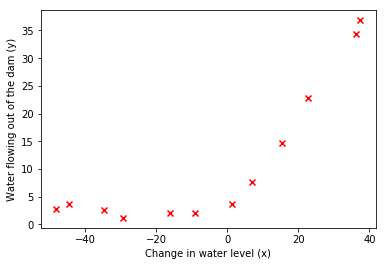

In [376]:
plt.scatter(X, y, color='r', marker='x')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.show()

### Regularized Linear Regression Cost Function

In [377]:
theta = np.array([1,1])[:, None]

In [378]:
ones = np.ones((X.shape[0], 1)); X = np.hstack([ones, X])

In [379]:
def linearRegCostFunction(theta, *args):
    X, y, lmbda = args[0], args[1], args[2]
    h = (X @ theta).reshape(-1, 1)
    m = X.shape[0]
    error = np.subtract(h, y)
    sq_error = error ** 2
    sse = np.sum(sq_error) / (2*m)
    reg_term = lmbda / (2*m) * np.sum(theta[1:]**2)
    
    J = sse + reg_term
    error = (h - y)
    grad=(1/m)*(X.T @error)
    reg = (lmbda * theta * (1/m)).reshape(-1, 1)
    grad = grad + reg
   

    return J, grad.reshape(-1)

In [380]:
J, grad = linearRegCostFunction(theta, X, y, 1); grad.shape

(2,)

### Regularized Linear Regression Gradient

In [381]:
def gradient(theta, *args):
    X, y, lmbda = args[0], args[1], args[2]
    m = len(y)
    h = (X @ theta).reshape(-1, 1)
    error = (h - y)
    grad=(1/m)*(np.matmul(X.T, error))
    return grad.reshape(-1)

In [382]:
gradient(theta, X, y, 1)

array([-15.30301567, 598.16741084])

### Fitting linear regression

In [383]:
result = minimize(linearRegCostFunction, theta, 
                  args = (X, y, 0), jac = True, 
                  options={'disp': True})

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6


In [384]:
thetas = result['x']

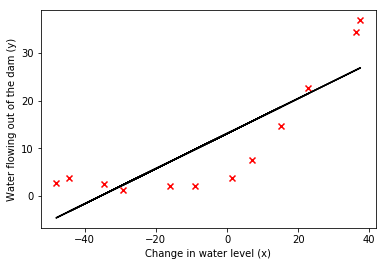

In [385]:
plt.scatter(X[:, 1], y, color='r', marker='x')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.plot(X[:, 1], thetas[0] + thetas[1] * X[:, 1], color='k')
plt.show()

## Learning Curves

In [386]:
sz = np.arange(len(X)) + 1;

In [387]:
trn_sz = [X[:i, :] for i in sz]

In [388]:
ones = np.ones((Xval.shape[0], 1)); Xval = np.hstack([ones, Xval])

In [389]:
def plot_learning_curves():
    fig = plt.figure
    for index, row in enumerate(trn_sz):
        result = minimize(linearRegCostFunction, theta, 
                      args = (row, y[:index + 1], 0), jac = True, 
                      options={'disp': False})
        error = result['fun']
        thetas = result['x'][:, None]

        # Cross Validation
        J_cv, _ = linearRegCostFunction(thetas, Xval, yval, 0)

        plt.scatter(index, error, color='blue')
        plt.scatter(index, J_cv, color='green')
    plt.ylabel('Error')
    plt.xlabel('Num Training Examples')
    plt.title('Learning Curve for Linear Regression');

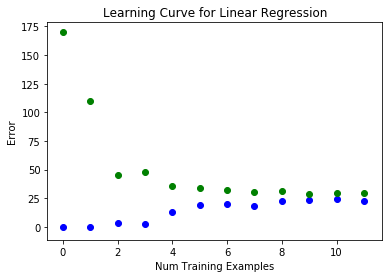

In [390]:
plot_learning_curves()

## Polynomial Regression

In [391]:
def add_features(X, p):
    X = X[:, 1].reshape(-1, 1)
    p_range = (np.arange(p) + 1).reshape(1, -1)
    return X ** p_range

In [392]:
x_poly = add_features(X, 8)

In [393]:
def featureNormalize(X):
    avg = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - avg) / std
    

In [394]:
x_poly_normalized = featureNormalize(x_poly);

In [395]:
ones = np.ones((x_poly_normalized.shape[0], 1));

In [396]:
x_p = np.hstack([ones, x_poly_normalized])

In [397]:
init_thetas = np.ones(x_p.shape[1]); 

In [398]:
result = minimize(linearRegCostFunction, init_thetas, 
                  args = (x_p, y, 0), jac = True, 
                  options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.028896
         Iterations: 75
         Function evaluations: 77
         Gradient evaluations: 77


In [399]:
thetas = result['x']

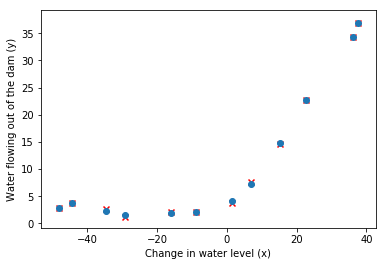

In [400]:
plt.scatter(X[:,1], y, color='r', marker='x')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.scatter(X[:, 1], x_p @ thetas)
plt.show()

### Learning Curve - Polynomial Regression

In [401]:
Xval = data['Xval']; yval = data['yval']

In [402]:
sz = np.arange(len(x_p)) + 1;

trn_sz = [x_p[:i, :] for i in sz]

In [403]:
p_range = (np.arange(8) + 1).reshape(1, -1)
Xval = Xval ** p_range

In [404]:
Xval = featureNormalize(Xval)

In [405]:
ones = np.ones((Xval.shape[0], 1));
Xval = np.hstack([ones, Xval])

In [406]:
Xval.shape

(21, 9)

In [407]:
def plot_error(thetas, lmbda):
    fig = plt.figure
    for index, row in enumerate(trn_sz):
        result = minimize(linearRegCostFunction, thetas, 
                      args = (row, y[:index + 1], lmbda), jac = True, 
                      options={'disp': False})

        error = result['fun']
        thetas = result['x'][:, None]

        # Cross Validation

        J_cv, _ = linearRegCostFunction(thetas, Xval, yval, lmbda)

        plt.scatter(index, error, color='blue')
        plt.scatter(index, J_cv, color='green')
    plt.ylabel('Error')
    plt.xlabel('Num Training Examples')
    plt.title('Polynomial Regression Learning Curve');
    return thetas


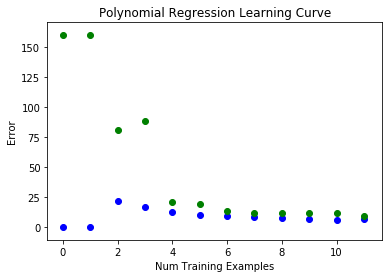

In [408]:
thetas = plot_error(thetas, 1)

In [409]:
def plot_water(thetas):
    plt.scatter(X[:,1], y, color='r', marker='x')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.scatter(X[:, 1], x_p @ thetas)
    plt.show()

array([[ 1.20411417],
       [ 0.98922374],
       [ 0.3415825 ],
       [ 0.766057  ],
       [ 0.15814426],
       [ 0.56801609],
       [ 0.0296748 ],
       [ 0.42618791],
       [-0.05193895]])

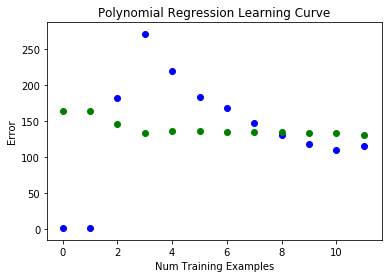

In [410]:
plot_error(thetas, 100)

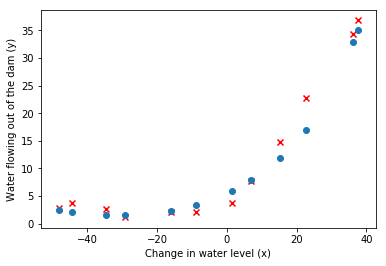

In [411]:
plot_water(thetas)